<a href="https://colab.research.google.com/github/Phoenixak2598/India---Air-Quality-Index/blob/main/AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import seaborn as sns
df= pd.read_csv("drive/My Drive/Colab Notebooks/Project/city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [19]:
df['Date']=pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015


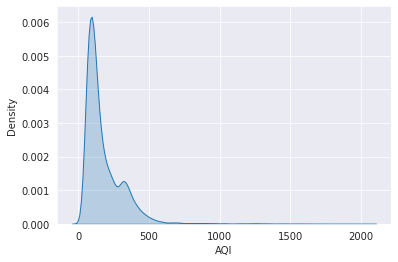

In [20]:
sns.set_style('darkgrid')
sns.kdeplot(data=df['AQI'],label="AQI",shade=True)

**Lowest AQI of City**

In [21]:
import matplotlib.pyplot as plt
aqi=df.groupby('City')['AQI'].min().reset_index()
aqi=aqi.sort_values("AQI")
aqi

,City,AQI
20,Talcher,13.0
19,Shillong,14.0
3,Amritsar,20.0
4,Bengaluru,20.0
6,Brajrajnagar,22.0
12,Hyderabad,22.0
2,Amaravati,24.0
11,Guwahati,25.0
7,Chandigarh,26.0
15,Kolkata,26.0


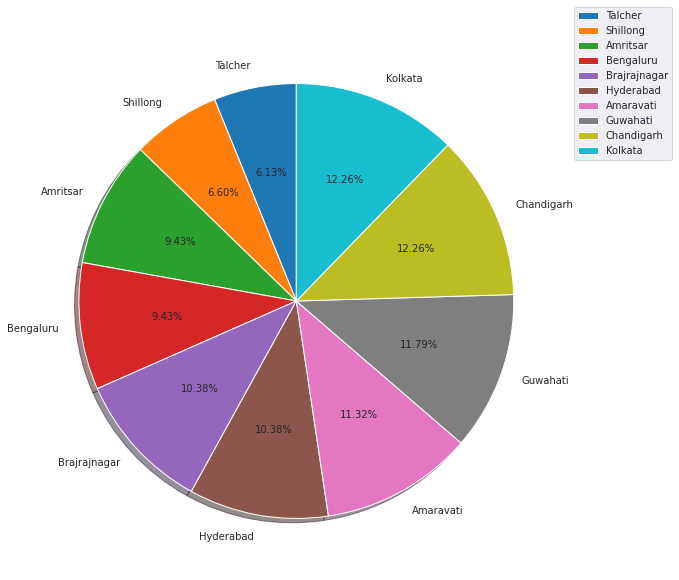

In [25]:
aqi=aqi.head(10)
fig1,ax1=plt.subplots(figsize=(15,10))
ax1.pie(aqi["AQI"].tolist(),labels=aqi['City'].tolist(),autopct="%1.2f%%",shadow=True,startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

In [49]:
import plotly.express as px
perc = df.loc[:, ["year", "City","AQI"]]
perc['mean_AQI']=perc.groupby([perc.City, perc.year])["AQI"].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top = ['Talcher', 'Amritsar', 'Brajrajnagar','Amaravati']
perc = perc.loc[perc['City'].isin(top)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_AQI', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show()

Highest AQI city

In [40]:
aqi2=df.groupby('City')['AQI'].max().reset_index()
aqi2=aqi2.sort_values("AQI")
aqi2.tail(10)

,City,AQI
20,Talcher,570.0
14,Jorapokhar,604.0
18,Patna,619.0
16,Lucknow,707.0
9,Delhi,716.0
12,Hyderabad,737.0
3,Amritsar,869.0
10,Gurugram,891.0
11,Guwahati,956.0
0,Ahmedabad,2049.0


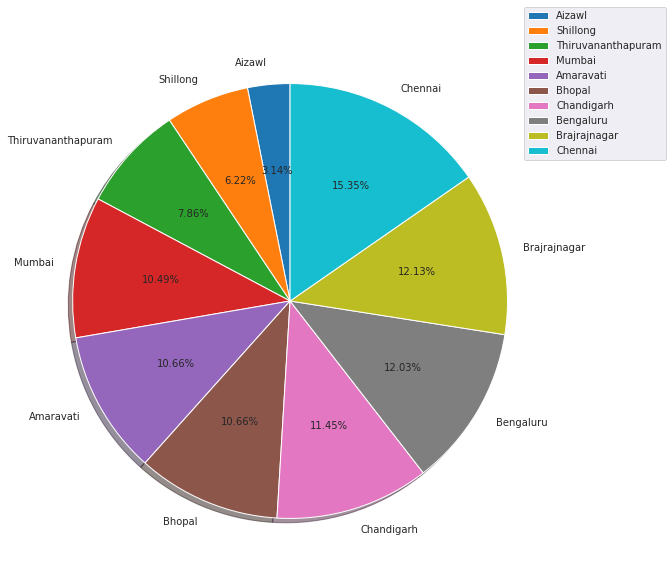

In [42]:
aqi2=aqi2.head(10)
fig1,ax1=plt.subplots(figsize=(15,10))
ax1.pie(aqi2["AQI"].tolist(),labels=aqi2['City'].tolist(),autopct="%1.2f%%",shadow=True,startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

In [43]:
perc = df.loc[:, ["year", "City","AQI"]]
perc['mean_AQI']=perc.groupby([perc.City, perc.year])["AQI"].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values('year', ascending=False)
top2 = ['Hyderabad', 'Amritsar', 'Gurugram', 'Guwahati','Ahmedabad']
perc = perc.loc[perc['City'].isin(top2)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig = px.bar(perc, x='City', y='mean_AQI', animation_frame="year", animation_group="City", color="City",
            hover_name="City")
fig.show()

In [50]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015
2,Ahmedabad,2015-01-03,NaN,NaN,NaN,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015
3,Ahmedabad,2015-01-04,NaN,NaN,NaN,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015
4,Ahmedabad,2015-01-05,NaN,NaN,NaN,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015


In [51]:
data1 = df['AQI'].dropna()
top_10_city = df.loc[data1.index].groupby('City')['AQI'].mean().reset_index()
top_10_city.sort_values('AQI', ascending=False, inplace=True)
top_10_city.head(10)

,City,AQI
0,Ahmedabad,473.912281
9,Delhi,262.255086
18,Patna,248.270153
10,Gurugram,230.518600
16,Lucknow,222.881833
20,Talcher,179.990506
14,Jorapokhar,162.746009
11,Guwahati,156.486683
15,Kolkata,151.535714
6,Brajrajnagar,151.519345


In [52]:
top_cities = top_10_city.head(10)['City'].tolist()
top_cities

['Ahmedabad',
 'Delhi',
 'Patna',
 'Gurugram',
 'Lucknow',
 'Talcher',
 'Jorapokhar',
 'Guwahati',
 'Kolkata',
 'Brajrajnagar']

**Talcher city - year wise mean of AQI**

In [53]:
talcher = df[df['City'] == "Talcher"]
data_by_year = talcher.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

,year,AQI
1,2018,185.744770
2,2019,169.023102
3,2020,201.633333


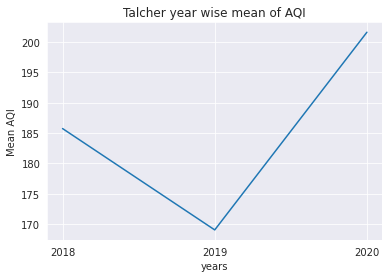

In [54]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Talcher year wise mean of AQI')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

**Brajrajnagar AQI map**

In [56]:
braj = df[df['City'] == "Brajrajnagar"]
data_by_year = braj.groupby('year')['AQI'].mean().reset_index().dropna()
data_by_year.head()

,year,AQI
0,2017,247.600000
1,2018,154.996154
2,2019,148.400621
3,2020,140.762500


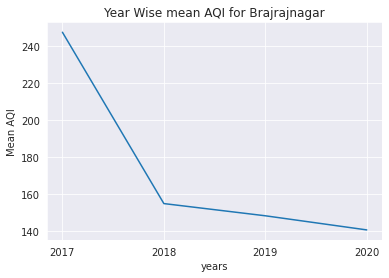

In [57]:
plt.plot(data_by_year['year'], data_by_year['AQI'])
plt.xticks(data_by_year['year'].tolist())
plt.title('Year Wise mean AQI for Brajrajnagar')
plt.xlabel("years")
plt.ylabel("Mean AQI")
plt.show()

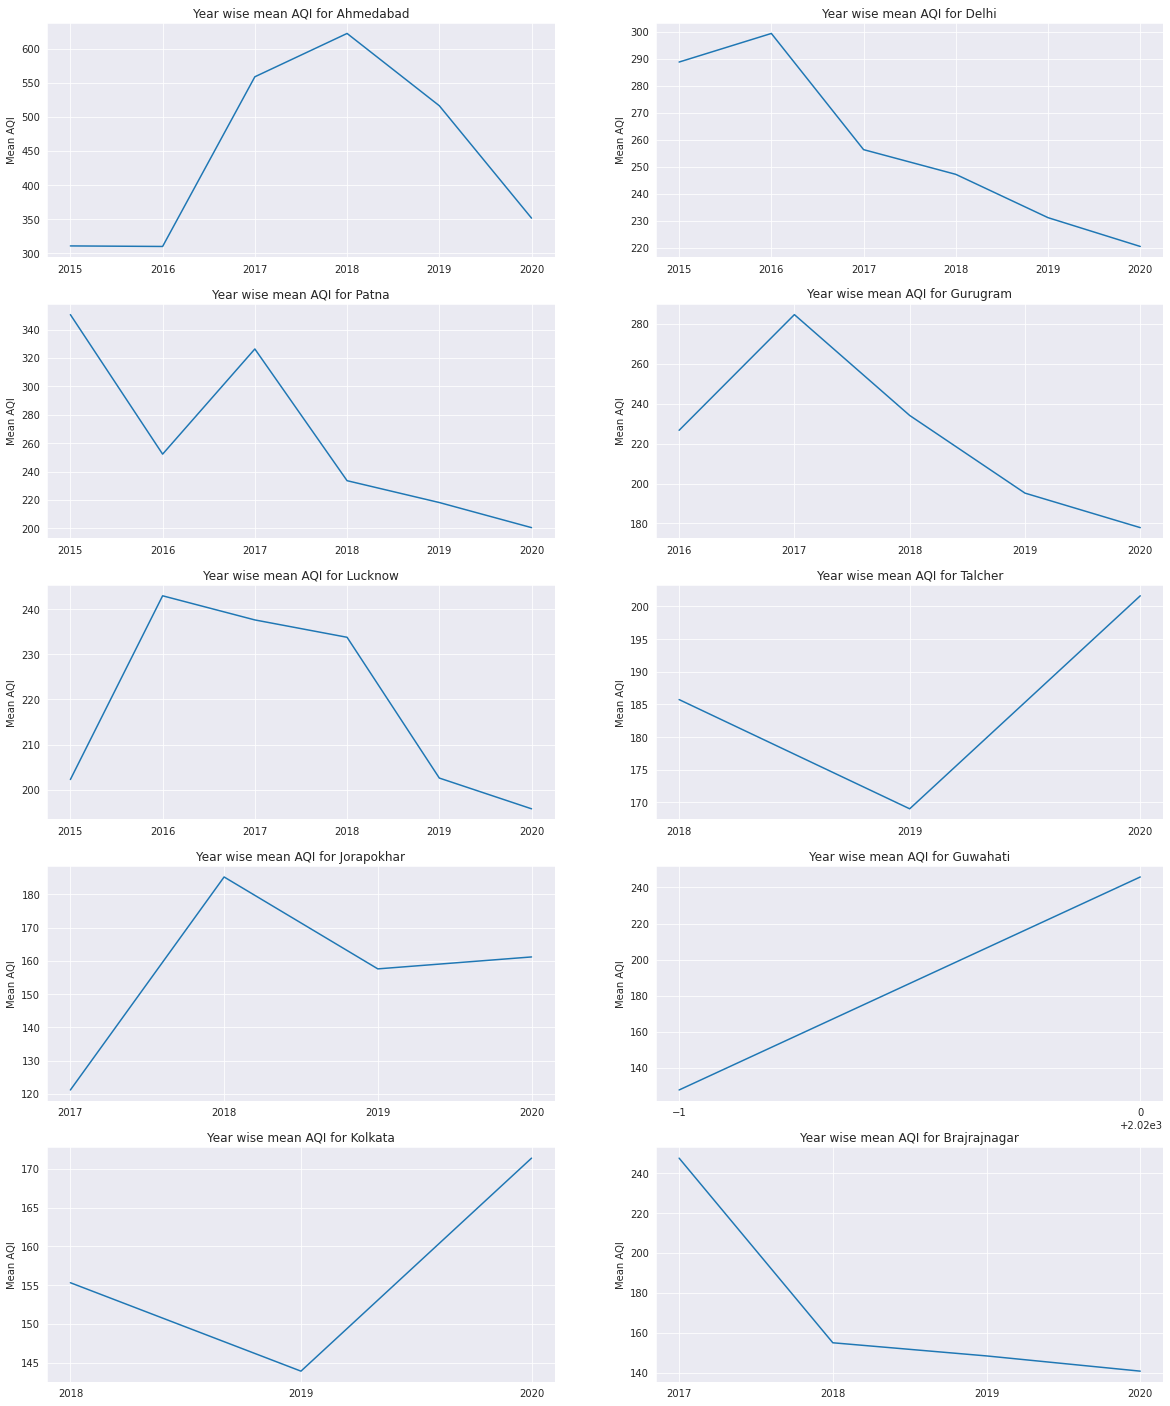

In [58]:
fig = plt.figure(figsize=(20,25))
for city, num in zip(top_cities, range(1,11)):
    df2 = df[df["City"]==city]
    data_by_year = df2.groupby('year')['AQI'].mean().reset_index().dropna()
    ax = fig.add_subplot(5,2,num)
    ax.plot(data_by_year['year'],data_by_year['AQI'])
    ax.set_xticks(data_by_year['year'].tolist())
    ax.set_title("Year wise mean AQI for {}".format(city))
    ax.set_ylabel('Mean AQI')